# Group Analysis 



## Subject Details
Total Number of Subjects = 94
Subjects included in the Group Analysis = 90
4 subjects were excluded due to very high displacement observed during motion correction, the estimates of displacement for these excluded subjects are provided in Appendix 1. 

## Group Analysis Design

### Single-Group Average (One-Sample T-Test)
This is the simplest possible linear model, where a single, homogeneous group of subjects is modelled, and the mean response is tested to see if it is different from zero. All 90 subjects are in one group and the mean group effect is estimated. We perform a nonparametric 1-sample t-test on COPEs created by FEAT FMRI analysis for each of the 6 contrasts. Significance on contrast C1 through C6 are observed for a positive effect, mean > 0. 
C1: video sentences- checkerboard
C2: video left motor – checkerboard
C3: video right motor – checkerboard
C4: video motor – checkerboard
C5: (video+audio) right motor – (video+audio) left motor
C6: (video+audio) sentences – checkerboard

### FLAME - Multi-Level Modelling for Group Analysis
To be able to generate results that accurately extend to the wider population, we need to account for the fact that these limited samples from the population are random quantities with associated random effects variances. In FSL, this has been implemented as FLAME (FMRIB's Local Analysis of Mixed Effects), the higher-level modelling tool used inside FEAT1. FLAME uses sophisticated methods for modelling and estimating the random-effects component of the measured inter-session mixed-effects variance, using MCMC sampling to get an accurate estimation of the true random-effects variance and degrees of freedom at each voxel1.

### Randomize Details
Permutation methods can provide robust control of false positives. For each contrast, 5000 permutations are performed to create one image. Since there are over 30 subjects, no additional smoothing was performed. For the single group average, assuming that the null hypothesis is true, the t-values would be random variations around mean of zero. Permutations are done by flipping the signs of the test statistics for each voxel. For an arbitrary GLM, FSL-Randomise uses the method of Freeman & Lane (1983)2. Based on the contrast (or set of contrasts), the design matrix is automatically partitioned into tested effects and nuisance (confound) effects. The data are first fit to the nuisance effects alone and nuisance-only residuals are formed. These residuals are permuted, and then the estimated nuisance signal is added back on, creating an (approximate) realization of data under the null hypothesis. This realization is fit to the full model and the desired test statistic is computed as usual. This process is repeated to build a distribution of test statistics equivalent under the null hypothesis specified by the contrast(s).


In [169]:
# Import relevant libraries

import numpy as np 
import os  #The OS module in Python provides functions for interacting with the operating system

# Visualization modules 
import seaborn as sns  
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

In [170]:
import nilearn
from nilearn.datasets import MNI152_FILE_PATH
from nilearn import plotting
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_anat, plot_img

# If thresholded images are required
from nilearn.glm import threshold_stats_img
# To generate cluster tables
from nilearn.reporting import get_clusters_table
from atlasreader import create_output


In [171]:
# Main data path
data_path = 'C:\\Users\\suruc\\Desktop\\fMRI_temp\\brainomics_data_fixed\\G90_Randomize+.gfeat\\'
# General name for all z-stat files
file_name = 'zstat1.nii.gz'
# Name for TCFE thresholded files
tcfe_file_name = 'thresh_zstat1.nii.gz'


##  C1: video sentences- checkerboard

In [172]:
# Un-thresholded Z-map
cont_dir1 = 'cope1.feat\\stats\\'
zstat1_gc1 = os.path.join(data_path,cont_dir1,file_name)

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\html_document.py:57: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



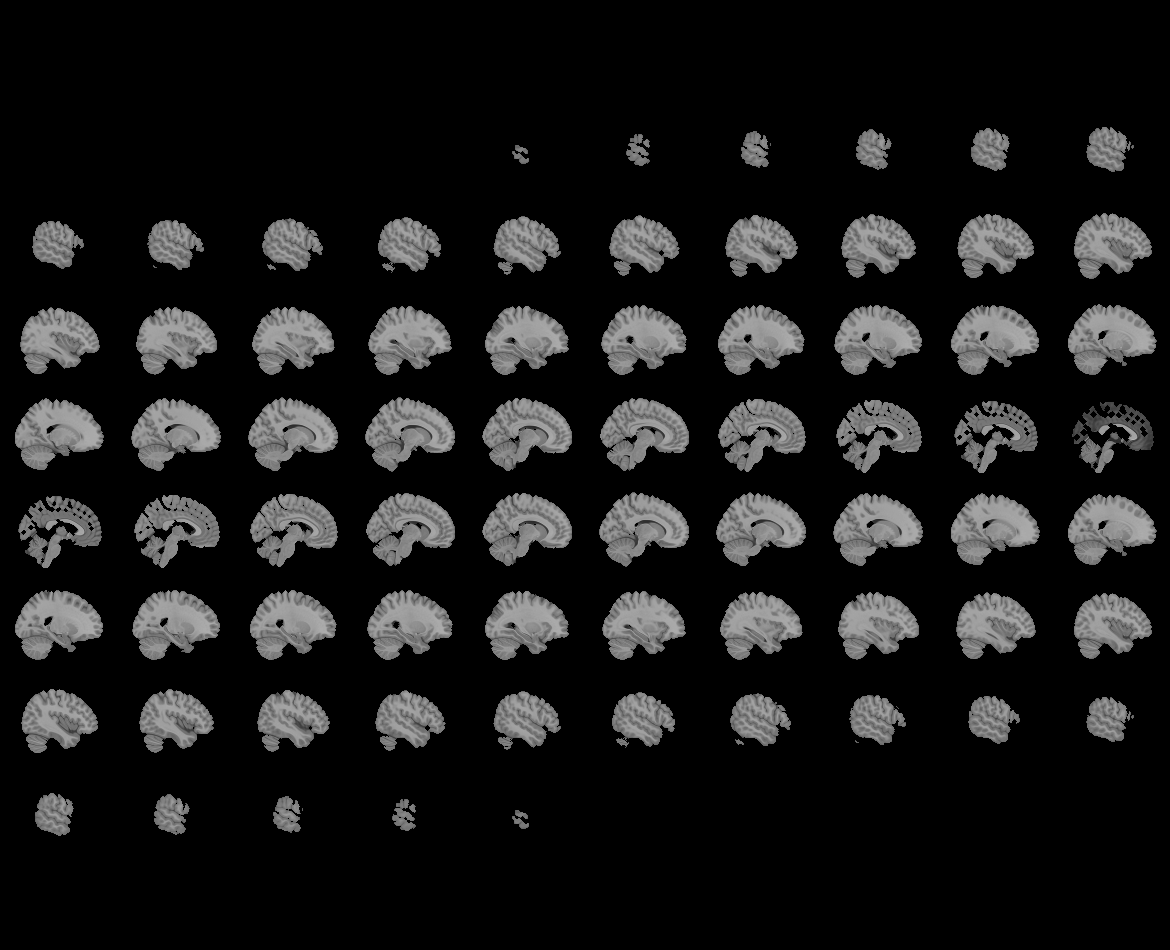
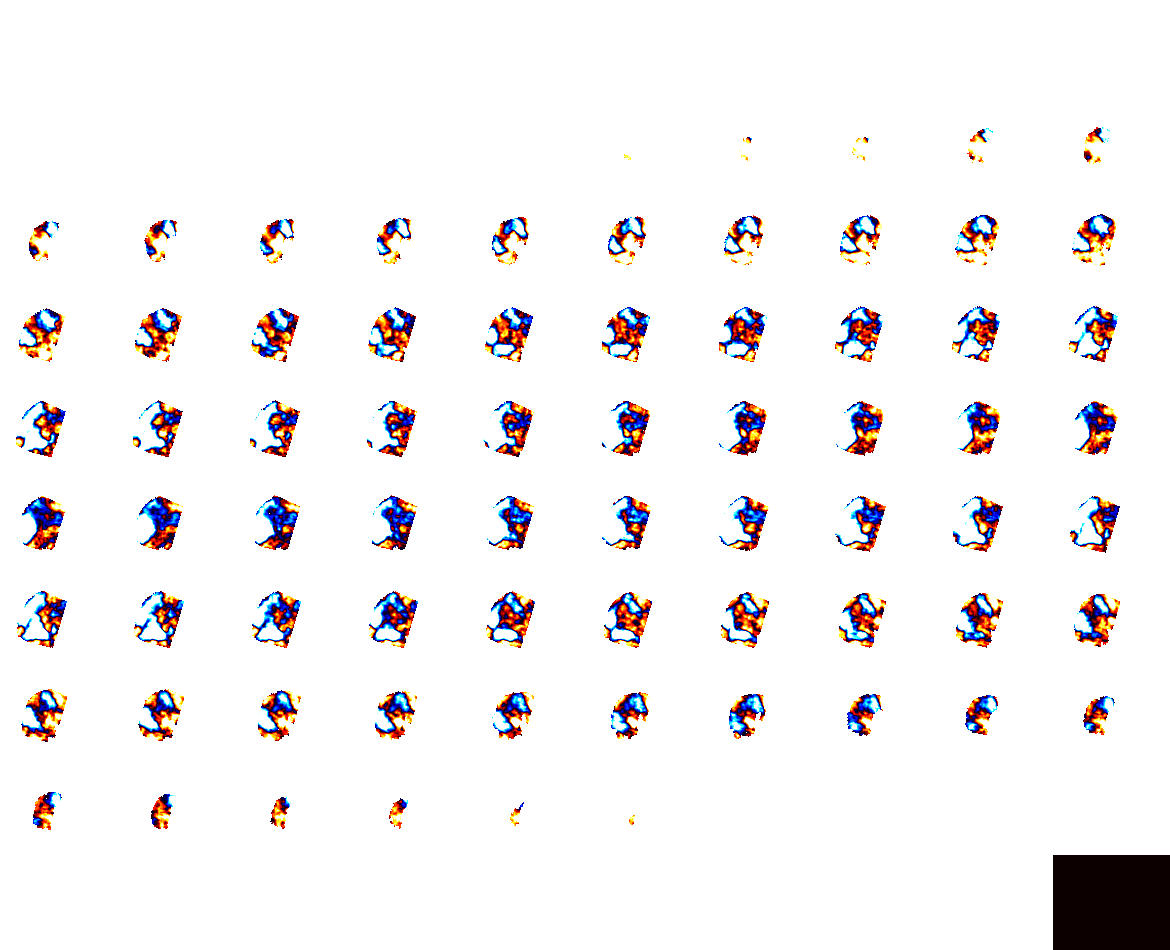

In [173]:
# Interactive map
plotting.view_img(zstat1_gc1)

### TCFE 
Threshold-Free Cluster Enhancement (TFCE) (at p = 5%) was used to threshold the images obtained from the Randomize results for the Group statistics. 

In [174]:
# Handling data for Group Contrast 1 as obtained from TCFE analysis
tcfe_thresh_zstat_gc1 = os.path.join(data_path,'cope1.feat\\',tcfe_file_name)

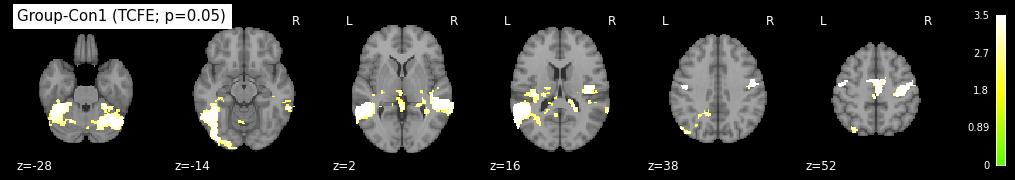

In [175]:
# Plot TCFE corrected map
plot_stat_map(tcfe_thresh_zstat_gc1,
              display_mode='z', cut_coords=6, black_bg=True,symmetric_cbar=False,cmap='black_green',
              title='Group-Con1 (TCFE; p=0.05)')
plt.show()

### Threshold Maps with FDR error correction for Group results

Compute the required threshold level and return the thresholded map

Parameters
stat_imgNiimg-like object or None, optional
Statistical image (presumably in z scale) whenever height_control is ‘fpr’ or None, stat_img=None is acceptable. If it is ‘fdr’ or ‘bonferroni’, an error is raised if stat_img is None.

alphafloat or list, optional
Number controlling the thresholding (either a p-value or q-value). Its actual meaning depends on the height_control parameter. This function translates alpha to a z-scale threshold. Default=0.001.

thresholdfloat, optional
Desired threshold in z-scale. This is used only if height_control is None. Default=3.0.

height_controlstring, or None optional
False positive control meaning of cluster forming threshold: None|’fpr’|’fdr’|’bonferroni’ Default=’fpr’.

cluster_thresholdfloat, optional
cluster size threshold. In the returned thresholded map, sets of connected voxels (clusters) with size smaller than this number will be removed. Default=0.

In [176]:
# FDR-corrected
# Un-thresholded Z-map
fdr_thresholded_map_c1, fdr_threshold_gc1 = threshold_stats_img(zstat1_gc1, alpha=0.05, height_control='fdr', cluster_threshold=10)
print('False Discovery rate = 0.05 threshold: %.3f' % fdr_threshold_gc1)

False Discovery rate = 0.05 threshold: 2.524


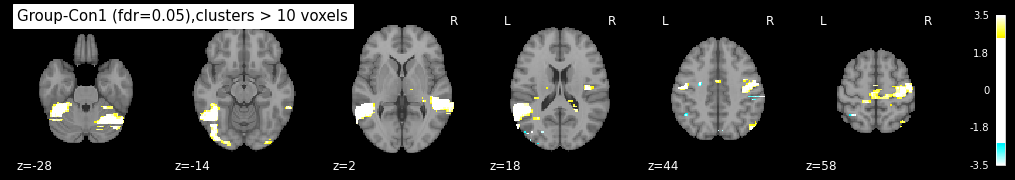

In [177]:
# Plot FDR corrected map
plot_stat_map(fdr_thresholded_map_c1, threshold=fdr_threshold_gc1,
              display_mode='z', cut_coords=6, black_bg=True,
              title='Group-Con1 (fdr=0.05),clusters > 10 voxels')
plt.show()

## Cluster Results

stat_img = Niimg-like object, Statistical image (presumably in z- or p-scale).

stat_threshold = float, Cluster forming threshold in same scale as stat_img (either a p-value or z-scale value).

cluster_threshold = int or None, optional, Cluster size threshold, in voxels.

In [178]:
table_gc1 = get_clusters_table(fdr_thresholded_map_c1, stat_threshold=fdr_threshold_gc1,
                           cluster_threshold=10, min_distance=0)
table_gc1

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,72.0,-34.0,4.0,3.540119,8128
1,1a,70.0,-34.0,6.0,3.540119,
2,1b,68.0,-48.0,0.0,3.540119,
3,1c,62.0,-50.0,4.0,3.540119,
4,2,-40.0,-34.0,-6.0,3.540119,136
5,3,-18.0,-50.0,36.0,3.540119,120
6,4,-20.0,-96.0,-8.0,3.540119,34904
7,4a,-46.0,-60.0,-28.0,3.540119,
8,4b,-38.0,-58.0,6.0,3.540119,
9,4c,-28.0,-36.0,-34.0,3.540119,


In [179]:
table_gc1['p-val']=scipy.stats.norm.sf(table_gc1['Peak Stat'])

In [180]:
# If needed save the file at relevant place
table_gc1.to_csv(os.path.join(data_path,cont_dir1,'table_fdr0.05.csv'))

### Glass brain visualization

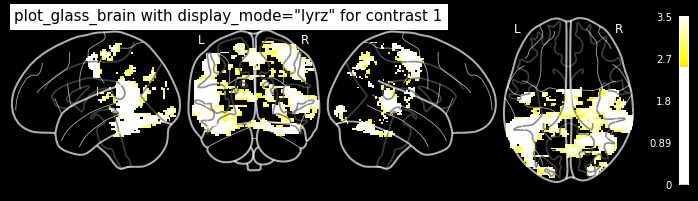

In [181]:
## Glass Maps with FDR error correction for Group results
plotting.plot_glass_brain(fdr_thresholded_map_c1,title='plot_glass_brain with display_mode="lyrz" for contrast 1', 
                          threshold=fdr_threshold_gc1,display_mode='lyrz',
                         colorbar=True, black_bg=True, cmap='cold_hot')
plotting.show()

## Atlas Reader to Obtain Cluster ROIs

In [182]:
create_output(fdr_thresholded_map_c1, cluster_extent=10,
              voxel_thresh=fdr_threshold_gc1,direction='pos',
              outdir=os.path.join(data_path,cont_dir1))

In [183]:
out_file_atls1 = pd.read_csv(os.path.join(data_path,cont_dir1,'atlasreader_peaks.csv'))

In [184]:
out_file_atls1

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,-48,-52,-4,0.00000,36784,Temporal_Mid_L,Left-Cerebral-White-Matter,12.0% Left_Middle_Temporal_Gyrus_temporooccipi...
1,2,32,-16,48,0.00000,13760,no_label,Right-Cerebral-White-Matter,18.0% Right_Precentral_Gyrus
2,3,54,-38,0,3.54012,8784,Temporal_Mid_R,Unknown,35.0% Right_Middle_Temporal_Gyrus_temporooccip...
3,4,34,-62,-30,3.54012,6648,Cerebelum_6_R,Right-Cerebellum-Cortex,0% no_label
4,5,0,-42,8,0.00000,3368,no_label,Unknown,7.0% Left_Cingulate_Gyrus_posterior_division
5,6,-46,-14,44,3.54012,2376,Postcentral_L,Left-Cerebral-White-Matter,47.0% Left_Precentral_Gyrus; 19.0% Left_Postce...
6,7,28,-96,-6,3.54012,1512,Occipital_Inf_R,Right-Cerebral-White-Matter,65.0% Right_Occipital_Pole
7,8,50,-68,46,2.54910,1440,Angular_R,Unknown,22.0% Right_Lateral_Occipital_Cortex_superior_...
8,9,42,-16,14,3.54012,1360,Insula_R,Unknown,46.0% Right_Central_Opercular_Cortex; 17.0% Ri...
9,10,-14,-36,62,3.54012,936,no_label,Left-Cerebral-White-Matter,26.0% Left_Postcentral_Gyrus; 13.0% Left_Prece...


## C2: video left motor – checkerboard

In [185]:
# Un-thresholded Z-map
cont_dir2 = 'cope2.feat\\stats\\'
zstat1_gc2 = os.path.join(data_path,cont_dir2,file_name)

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\html_document.py:57: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



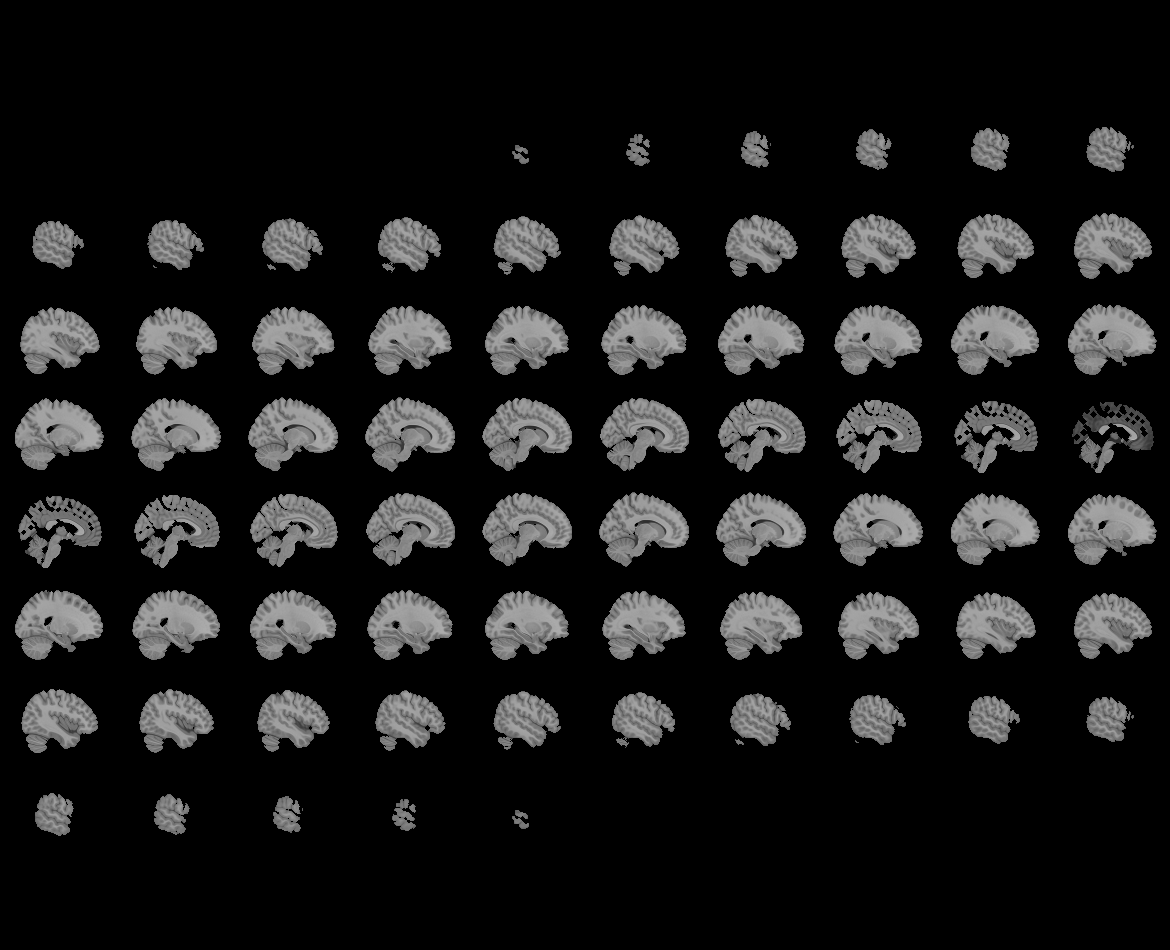
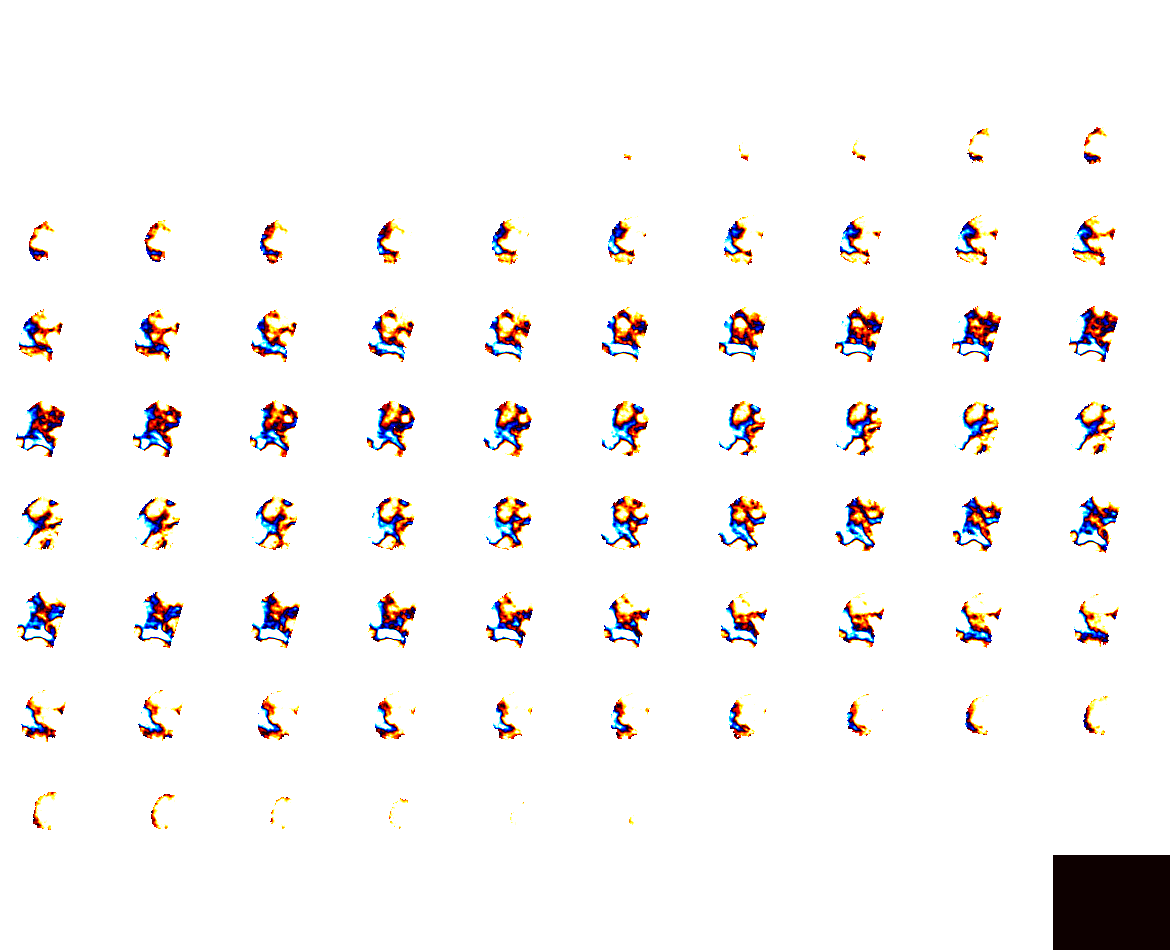

In [186]:
# Interactive map
plotting.view_img(zstat1_gc2)

### TCFE 
Threshold-Free Cluster Enhancement (TFCE) (at p = 5%) was used to threshold the images obtained from the Randomize results for the Group statistics. 

In [187]:
# Handling data for Group Contrast 1 as obtained from TCFE analysis
tcfe_thresh_zstat_gc2 = os.path.join(data_path,'cope2.feat\\',tcfe_file_name)

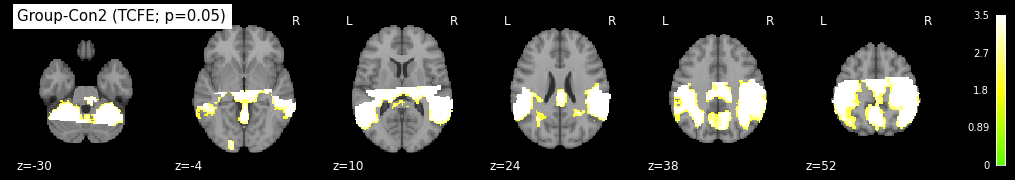

In [188]:
# Plot TCFE corrected map
plot_stat_map(tcfe_thresh_zstat_gc2,
              display_mode='z', cut_coords=6, black_bg=True,symmetric_cbar=False,cmap='black_green',
              title='Group-Con2 (TCFE; p=0.05)')
plt.show()

### Threshold Maps with FDR error correction for Group results

Compute the required threshold level and return the thresholded map

Parameters
stat_imgNiimg-like object or None, optional
Statistical image (presumably in z scale) whenever height_control is ‘fpr’ or None, stat_img=None is acceptable. If it is ‘fdr’ or ‘bonferroni’, an error is raised if stat_img is None.

alphafloat or list, optional
Number controlling the thresholding (either a p-value or q-value). Its actual meaning depends on the height_control parameter. This function translates alpha to a z-scale threshold. Default=0.001.

thresholdfloat, optional
Desired threshold in z-scale. This is used only if height_control is None. Default=3.0.

height_controlstring, or None optional
False positive control meaning of cluster forming threshold: None|’fpr’|’fdr’|’bonferroni’ Default=’fpr’.

cluster_thresholdfloat, optional
cluster size threshold. In the returned thresholded map, sets of connected voxels (clusters) with size smaller than this number will be removed. Default=0.

In [189]:
# FDR-corrected
# Un-thresholded Z-map
fdr_thresholded_map_c2, fdr_threshold_gc2 = threshold_stats_img(zstat1_gc2, alpha=0.05, height_control='fdr', cluster_threshold=10)
print('False Discovery rate = 0.05 threshold: %.3f' % fdr_threshold_gc2)

False Discovery rate = 0.05 threshold: 2.214


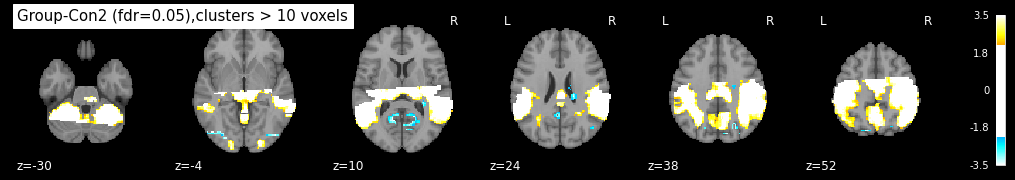

In [190]:
# Plot FDR corrected map
plot_stat_map(fdr_thresholded_map_c2, threshold=fdr_threshold_gc2,
              display_mode='z', cut_coords=6, black_bg=True,
              title='Group-Con2 (fdr=0.05),clusters > 10 voxels')
plt.show()

## Cluster Results

stat_img = Niimg-like object, Statistical image (presumably in z- or p-scale).

stat_threshold = float, Cluster forming threshold in same scale as stat_img (either a p-value or z-scale value).

cluster_threshold = int or None, optional, Cluster size threshold, in voxels.

In [191]:
table_gc2 = get_clusters_table(fdr_thresholded_map_c2, stat_threshold=fdr_threshold_gc2,
                           cluster_threshold=10, min_distance=0)
table_gc2

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,4.0,-32.0,-28.0,3.540119,329040
1,1a,2.0,-38.0,70.0,3.540119,
2,1b,0.0,-56.0,-32.0,3.540119,
3,1c,2.0,-36.0,0.0,3.540119,
4,2,42.0,-84.0,-12.0,3.540119,144
5,3,42.0,-86.0,-18.0,3.540119,24
6,4,24.0,-94.0,-8.0,3.540119,1896
7,4a,34.0,-96.0,-8.0,3.352790,
8,5,32.0,-20.0,-8.0,3.540119,40
9,6,-20.0,-96.0,-10.0,3.540119,1544


In [196]:
table_gc2['p-val']=scipy.stats.norm.sf(table_gc2['Peak Stat'])

In [197]:
# If needed save the file at relevant place
table_gc2.to_csv(os.path.join(data_path,cont_dir2,'table_fdr0.05.csv'))

### Glass brain visualization

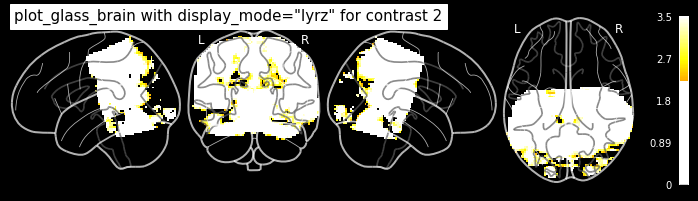

In [198]:
## Glass Maps with FDR error correction for Group results
plotting.plot_glass_brain(fdr_thresholded_map_c2,title='plot_glass_brain with display_mode="lyrz" for contrast 2', 
                          threshold=fdr_threshold_gc2,display_mode='lyrz',
                         colorbar=True, black_bg=True, cmap='cold_hot')
plotting.show()

## Atlas Reader to Obtain Cluster ROIs

In [199]:
create_output(fdr_thresholded_map_c2, cluster_extent=10,
              voxel_thresh=fdr_threshold_gc2,direction='pos',
              outdir=os.path.join(data_path,cont_dir2))

In [200]:
out_file_atls2 = pd.read_csv(os.path.join(data_path,cont_dir2,'atlasreader_peaks.csv'))

In [201]:
out_file_atls2

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,8,-38,24,0.00000,331280,no_label,ctx-rh-isthmuscingulate,10.0% Right_Cingulate_Gyrus_posterior_division
1,2,26,-94,-10,3.54012,2424,Occipital_Inf_R,Right-Cerebral-White-Matter,47.0% Right_Occipital_Pole; 9.0% Right_Lateral...
2,3,-18,-98,-10,3.54012,1576,Occipital_Inf_L,Left-Cerebral-White-Matter,64.0% Left_Occipital_Pole
